In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

path = 'C:/Users/gomed/OneDrive/Escritorio/MD_project/raw_data/'

In [2]:
phenotype_df = pd.read_csv(os.path.join(path, 'phenotype_data.tsv'), sep='\t')
phenotype_df.head()

,eid,f_1239_0_0,f_1239_1_0,f_1239_2_0,f_1239_3_0,f_1249_0_0,f_1249_1_0,f_1249_2_0,f_1249_3_0,f_1259_0_0,...,f_22037_2_0,f_22037_3_0,f_22038_0_0,f_22038_1_0,f_22038_2_0,f_22038_3_0,f_22039_0_0,f_22039_1_0,f_22039_2_0,f_22039_3_0
0,1000012,0.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000021,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,...,NaN,NaN,4320.0,NaN,NaN,NaN,320.0,NaN,NaN,NaN
2,1000035,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,1000044,0.0,0.0,NaN,NaN,2.0,1.0,NaN,NaN,1.0,...,NaN,NaN,0.0,240.0,NaN,NaN,0.0,960.0,NaN,NaN
4,1000053,0.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,0.0,...,NaN,NaN,240.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
phenotype_df.shape

(502180, 509)

In [4]:
#Olink Chars
# Leer el archivo original, saltando las primeras 5 líneas
with open(os.path.join(path, 'phenotype_chars.tsv'), 'r') as f:
    lines = f.readlines()[5:]

# Guardar el resultado en un nuevo archivo
with open(os.path.join(path, "phenotype_chars_table.tsv"), 'w') as f:
    f.writelines(lines)

In [5]:

phenotype_chars_df = pd.read_csv(os.path.join(path, 'phenotype_chars_table.tsv'), sep="\t")

#Crear columna con el nombre de las proteinas y ordenar df
cols = phenotype_chars_df.columns.tolist()
phenotype_chars_df.insert(cols.index('ValueType'), 'pname',phenotype_chars_df['Field'].str.split(";").str[0])
phenotype_chars_df.head()

,Field,FieldID,pname,ValueType,Coding,Category,Participants,Items,Stability,Units,ItemType,Strata,Sexed,Instances,Array,Notes,Link,Path
0,Current tobacco smoking,1239,Current tobacco smoking,Categorical single,100347.0,100058,501500,597678,Complete,NaN,Data,Primary,Unisex,4,1,"ACE touchscreen question """"""""Do you smoke toba...",http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=...,Assessment centre > Touchscreen > Lifestyle an...
1,Past tobacco smoking,1249,Past tobacco smoking,Categorical single,100348.0,100058,464200,556298,Complete,NaN,Data,Primary,Unisex,4,1,"ACE touchscreen question """"""""In the past, how ...",http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=...,Assessment centre > Touchscreen > Lifestyle an...
2,Smoking/smokers in household,1259,Smoking/smokers in household,Categorical single,100370.0,100058,461855,552928,Complete,NaN,Data,Primary,Unisex,4,1,"ACE touchscreen question """"""""Does anyone in yo...",http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=...,Assessment centre > Touchscreen > Lifestyle an...
3,Exposure to tobacco smoke at home,1269,Exposure to tobacco smoke at home,Integer,100291.0,100058,464571,556698,Complete,hours/week,Data,Primary,Unisex,4,1,"ACE touchscreen question """"""""At home, about ho...",http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=...,Assessment centre > Touchscreen > Lifestyle an...
4,Exposure to tobacco smoke outside home,1279,Exposure to tobacco smoke outside home,Integer,100291.0,100058,464571,556698,Complete,hours/week,Data,Primary,Unisex,4,1,"ACE touchscreen question """"""""Outside of your h...",http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=...,Assessment centre > Touchscreen > Lifestyle an...


In [6]:
nombres = phenotype_df.columns

# Si por alguna razón hay columnas repetidas y quieres filtrar:
nombres_unicos = phenotype_df.columns.unique()

# Imprimirlos
print(nombres_unicos)


Index(['eid', 'f_1239_0_0', 'f_1239_1_0', 'f_1239_2_0', 'f_1239_3_0',
       'f_1249_0_0', 'f_1249_1_0', 'f_1249_2_0', 'f_1249_3_0', 'f_1259_0_0',
       ...
       'f_22037_2_0', 'f_22037_3_0', 'f_22038_0_0', 'f_22038_1_0',
       'f_22038_2_0', 'f_22038_3_0', 'f_22039_0_0', 'f_22039_1_0',
       'f_22039_2_0', 'f_22039_3_0'],
      dtype='object', length=509)


In [7]:
report_nan = pd.DataFrame({
    'NaNs': phenotype_df.isna().sum(),
    '% NaNs': phenotype_df.isna().mean() * 100
})
print(report_nan)

               NaNs     % NaNs
eid               0   0.000000
f_1239_0_0      892   0.177626
f_1239_1_0   481851  95.951850
f_1239_2_0   425209  84.672627
f_1239_3_0   494943  98.558883
...             ...        ...
f_22038_3_0  496910  98.950575
f_22039_0_0  117141  23.326496
f_22039_1_0  484881  96.555219
f_22039_2_0  442886  88.192680
f_22039_3_0  496910  98.950575

[509 rows x 2 columns]


In [8]:
phenotype_df.describe().T

,count,mean,std,min,25%,50%,75%,max
eid,502180.0,3.511245e+06,1.449835e+06,1000012.0,2255650.75,3511289.5,4766829.0,6022444.0
f_1239_0_0,501288.0,1.304280e-01,4.224044e-01,-3.0,0.00,0.0,0.0,2.0
f_1239_1_0,20329.0,5.799597e-02,2.919474e-01,-3.0,0.00,0.0,0.0,2.0
f_1239_2_0,76971.0,4.653701e-02,2.719225e-01,-3.0,0.00,0.0,0.0,2.0
f_1239_3_0,7237.0,3.233384e-02,2.444616e-01,-3.0,0.00,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
f_22038_3_0,5270.0,1.055268e+03,1.175735e+03,0.0,240.00,640.0,1440.0,5040.0
f_22039_0_0,385039.0,6.789411e+02,1.170871e+03,0.0,0.00,240.0,960.0,10080.0
f_22039_1_0,17299.0,6.397632e+02,1.003487e+03,0.0,0.00,240.0,960.0,10080.0
f_22039_2_0,59294.0,7.261643e+02,1.103649e+03,0.0,0.00,320.0,960.0,10080.0


In [9]:
print(phenotype_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502180 entries, 0 to 502179
Columns: 509 entries, eid to f_22039_3_0
dtypes: float64(508), int64(1)
memory usage: 1.9 GB
None


In [10]:
#Missing Values Analysis
missing_percent = phenotype_df.isnull().mean().sort_values(ascending=False) * 100
print("\nTop 20 Columns with Missing Values:")
print(missing_percent.head(20))


Top 20 Columns with Missing Values:
f_6155_2_5     99.899837
f_3894_1_0     99.897049
f_6154_1_2     99.896850
f_10004_0_1    99.888685
f_6151_0_2     99.884902
f_3466_1_0     99.884703
f_3456_1_0     99.884703
f_6151_2_1     99.881317
f_3659_2_0     99.879724
f_6157_0_3     99.879127
f_6155_1_2     99.872556
f_3446_1_0     99.871162
f_3436_1_0     99.871162
f_3506_1_0     99.871162
f_3627_1_0     99.870963
f_6151_3_0     99.869967
f_3859_1_0     99.869967
f_3005_3_0     99.869967
f_6144_2_2     99.866183
f_4022_2_0     99.858417
dtype: float64


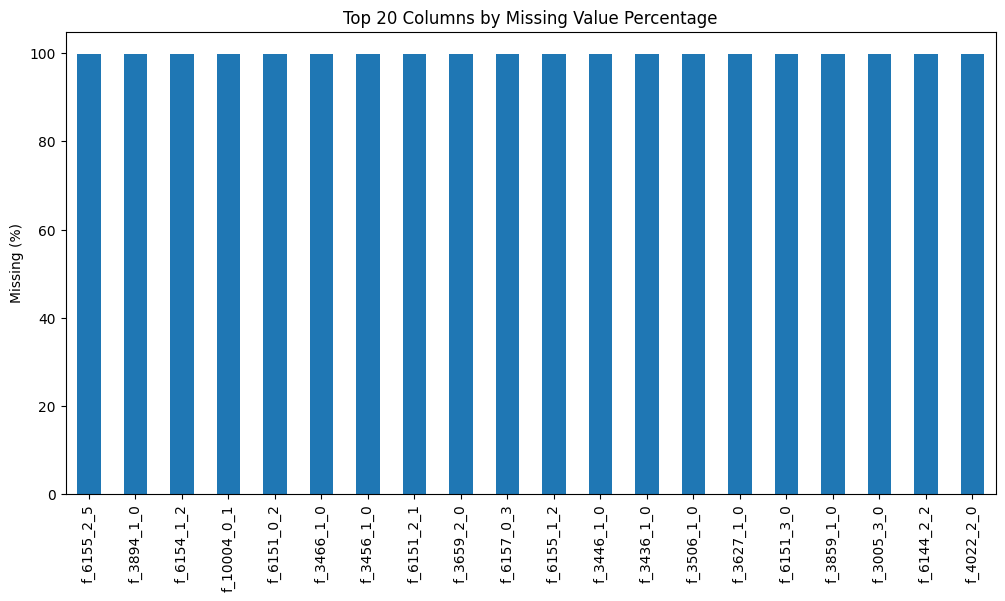

In [12]:
# Visualize missing values
plt.figure(figsize=(12, 6))
missing_percent[missing_percent > 0].head(20).plot(kind='bar')
plt.title("Top 20 Columns by Missing Value Percentage")
plt.ylabel("Missing (%)")
plt.show()

In [13]:
# 3. Detect Constant Columns
constant_cols = [col for col in phenotype_df.columns if phenotype_df[col].nunique() == 1]
print(f"\nConstant Columns ({len(constant_cols)}): {constant_cols}")


Constant Columns (4): ['f_6155_0_6', 'f_6157_0_3', 'f_6177_0_2', 'f_6179_0_5']


In [14]:
# 4. Data Distribution Analysis
# Separate numerical and categorical columns
numerical_cols = phenotype_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = phenotype_df.select_dtypes(include=['object']).columns.tolist()

In [17]:
len(numerical_cols)

509

In [20]:
len(categorical_cols)

0

In [ ]:
# Keep columns ending with '0_0'
selected_columns = [col for col in phenotype_df.columns if col.endswith('0_0')]
phenotype_df = phenotype_df[selected_columns]

#phenotype_df.shape

(502180, 129)

In [22]:
phenotype_df.head()

,f_1239_0_0,f_1249_0_0,f_1259_0_0,f_1269_0_0,f_1279_0_0,f_1289_0_0,f_1299_0_0,f_1309_0_0,f_1319_0_0,f_1329_0_0,...,f_20162_0_0,f_21000_0_0,f_22032_0_0,f_22033_0_0,f_22034_0_0,f_22035_0_0,f_22036_0_0,f_22037_0_0,f_22038_0_0,f_22039_0_0
0,0.0,4.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,3.0,...,NaN,1001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.712500,1001.0,2.0,16.0,370.0,1.0,1.0,3564.0,4320.0,320.0
2,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,...,0.462963,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,1.0,0.0,0.0,8.0,8.0,4.0,0.0,1.0,...,NaN,1001.0,0.0,2.0,15.0,0.0,0.0,99.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,-10.0,2.0,...,NaN,1001.0,1.0,10.0,50.0,0.0,1.0,693.0,240.0,0.0
